In [1]:
import pandas as pd
df = pd.read_csv('encoded.csv', index_col=0)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [2]:
list(df.columns.values)

['date',
 'time',
 'district',
 'n_p',
 'dtp_v',
 's_pch',
 'osv',
 'change_org_motion',
 'woman_drv',
 'pogoda',
 'driver_narush',
 'alco',
 'posled',
 'sdor']

In [3]:
df.fillna(method ='ffill', inplace = True)

In [2]:
df.date = pd.to_datetime(df.date)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [10]:
import itertools
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
#Функция построения графика матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Обучаем модель Random Forest на данных ДТП 2015 года

In [5]:
dfl = df[df['date'].dt.year == 2015]

In [6]:
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.7410415703760094

# Тестируем модель (15) на данных ДТП 2015 года

[[ 1307   871  3568]
 [  395  8786  2227]
 [ 1208  1488 16931]]


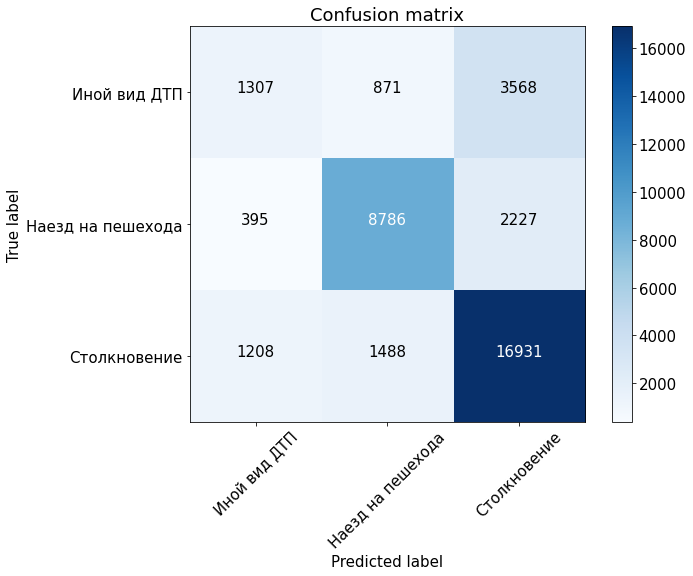

Точность модели составляет : 73.47271689187352


In [11]:
y_pred = rfc.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Тестируем модель (15) на данных ДТП 2016 года

In [12]:
dfl = df[df['date'].dt.year == 2016]

In [13]:
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)

In [15]:
y_pred = rfc.predict(X1_test)

[[ 1104   868  3490]
 [  308  8101  1991]
 [  862  1703 16296]]


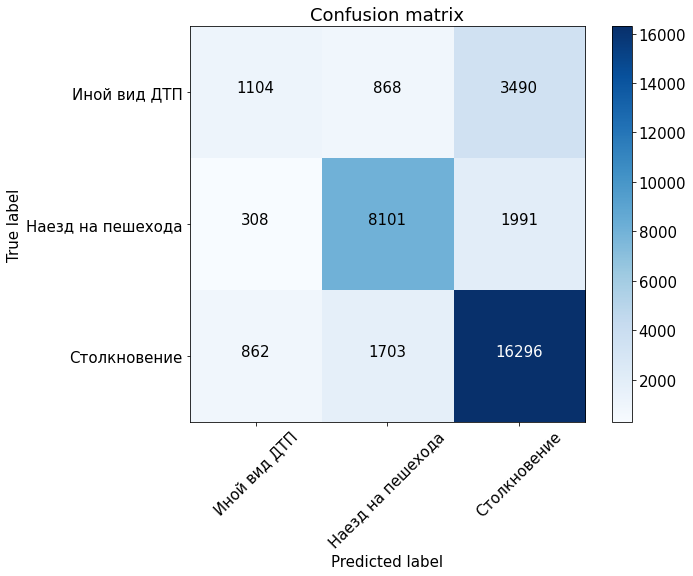

Точность модели составляет : 73.44123491633788


In [16]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Тестируем модель (15) на данных ДТП 2017 года

In [17]:
dfl = df[df['date'].dt.year == 2017]

In [18]:
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [19]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size = 0.2)

In [20]:
y_pred = rfc.predict(X2_test)

[[ 1050   896  3210]
 [  285  8275  1910]
 [  847  1767 15624]]


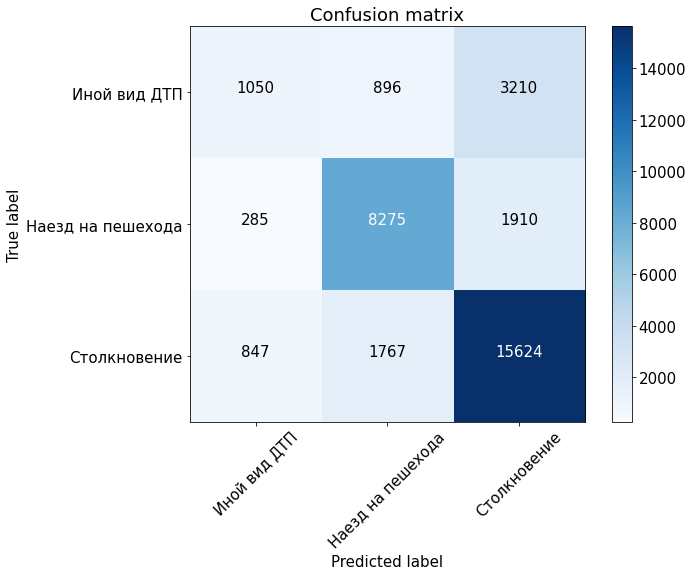

Точность модели составляет : 73.67410819749587


In [21]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y2_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y2_test,y_pred)*100)

# Тестируем модель (15) на данных ДТП 2018 года

In [22]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [23]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X3_test)

[[ 1007  1025  3038]
 [  247  7671  1844]
 [  781  2005 15991]]


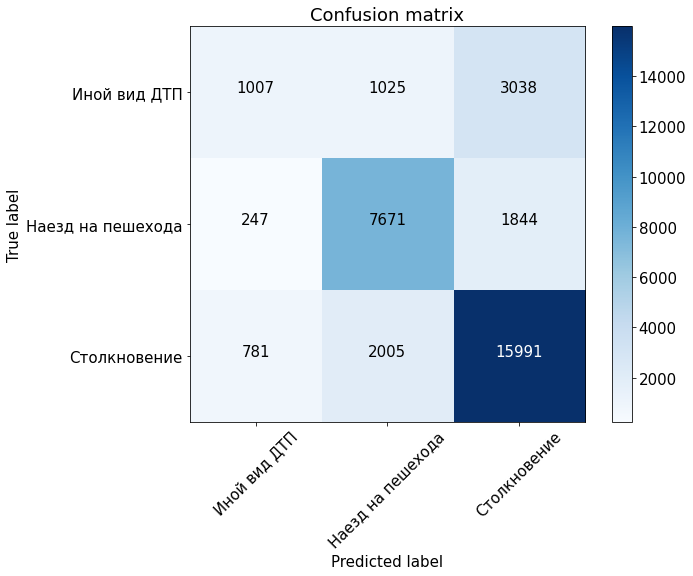

Точность модели составляет : 73.39998214763902


In [24]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y3_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y3_test,y_pred)*100)

# Тестируем модель (15) на данных ДТП 2019 года

In [25]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [26]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X4_test)

[[  916   798  3016]
 [  219  6488  1620]
 [  595  1727 14049]]


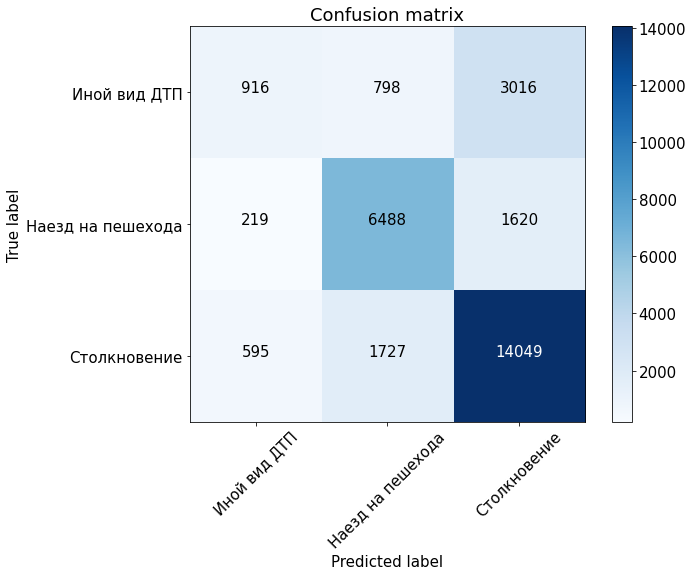

Точность модели составляет : 72.89995922250917


In [27]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y4_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y4_test,y_pred)*100)

# Обучаем модель Random Forest на данных ДТП 2016 года

In [58]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.7397330299801285

# Тестируем модель (16) на данных ДТП 2016 года

[[ 1023   856  3592]
 [  242  7871  2287]
 [  922  1541 16389]]


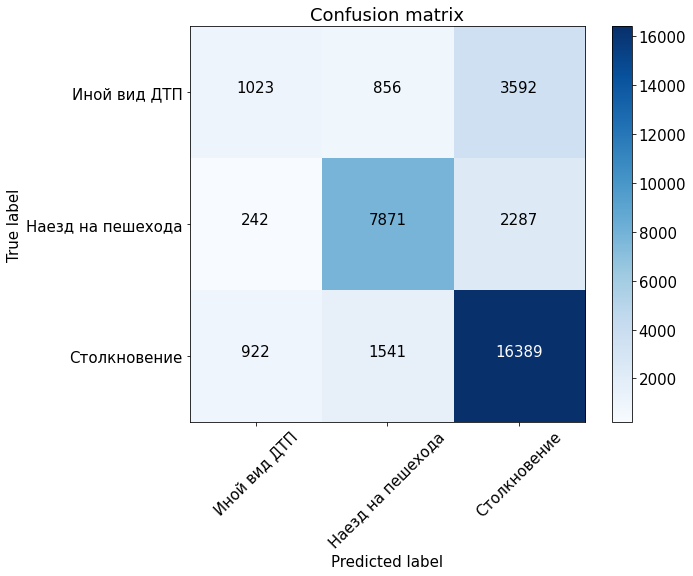

Точность модели составляет : 72.81340897963887


In [30]:
y_pred = rfc.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Тестируем модель (16) на данных ДТП 2017 года

In [60]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[  800   836  3459]
 [  216  8111  2182]
 [  660  1549 16051]]


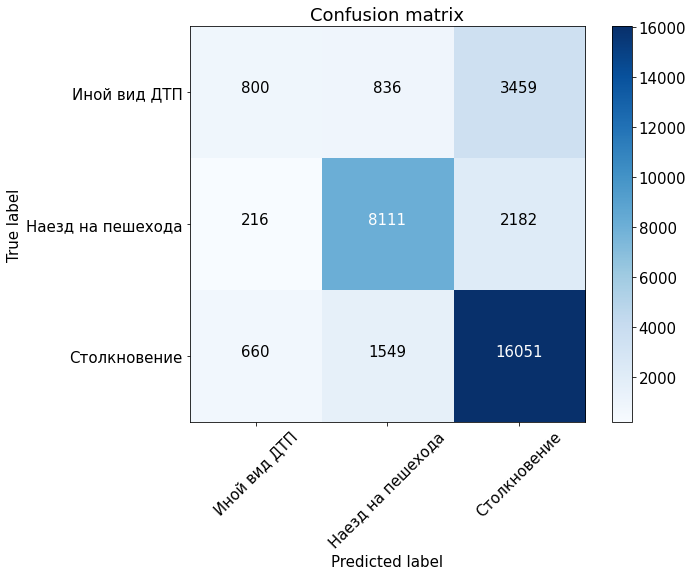

Точность модели составляет : 73.71249704701157


In [61]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Тестируем модель (16) на данных ДТП 2018 года

In [33]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[  944  1015  3244]
 [  166  7483  2156]
 [  747  1701 16153]]


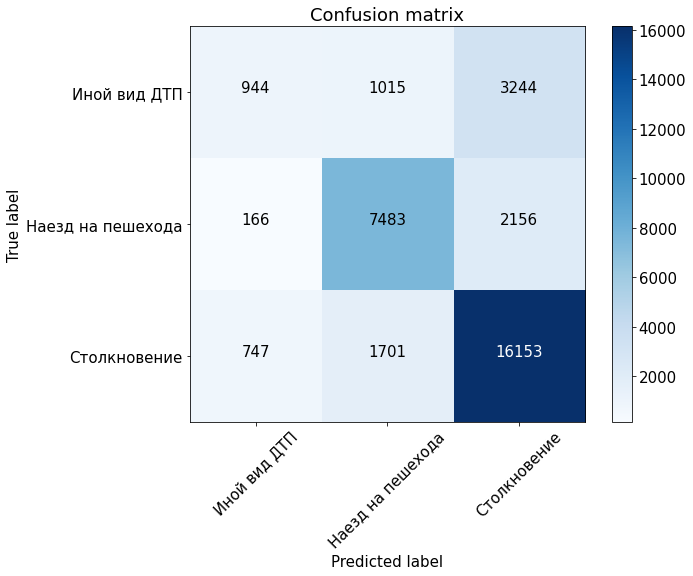

Точность модели составляет : 73.13517212651374


In [34]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X2_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y2_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y2_test,y_pred)*100)

# Тестируем модель (16) на данных ДТП 2019 года

In [35]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[  896   789  2945]
 [  173  6279  1915]
 [  693  1487 14251]]


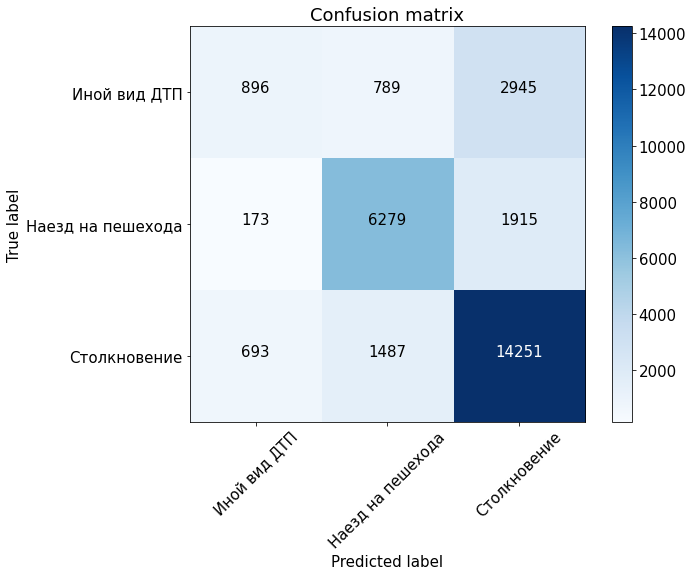

Точность модели составляет : 72.80820986815279


In [36]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X3_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y3_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y3_test,y_pred)*100)

# Обучаем модель Random Forest на данных ДТП 2017 года

In [37]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.7441087880935506

# Тестируем модель (17) на данных ДТП 2017 года

[[ 1070   859  3228]
 [  302  8025  2129]
 [  879  1559 15813]]


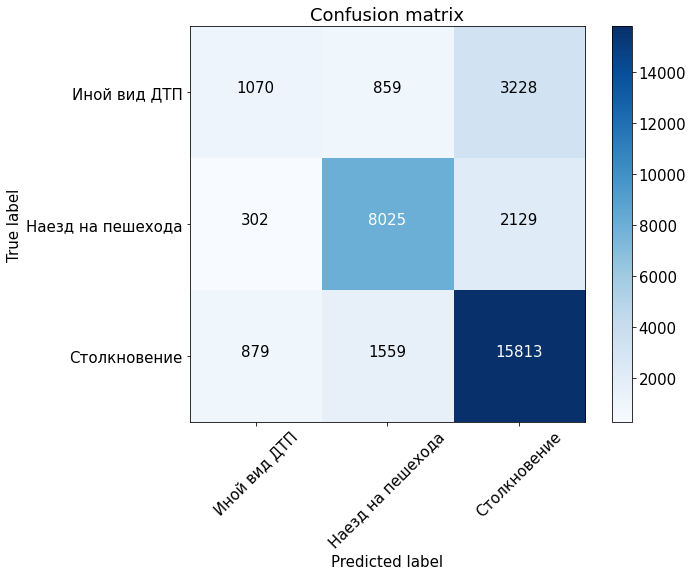

Точность модели составляет : 73.55303567210017


In [39]:
y_pred = rfc.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Тестируем модель (17) на данных ДТП 2018 года

In [40]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1051   951  3150]
 [  303  7491  2002]
 [  807  1754 16100]]


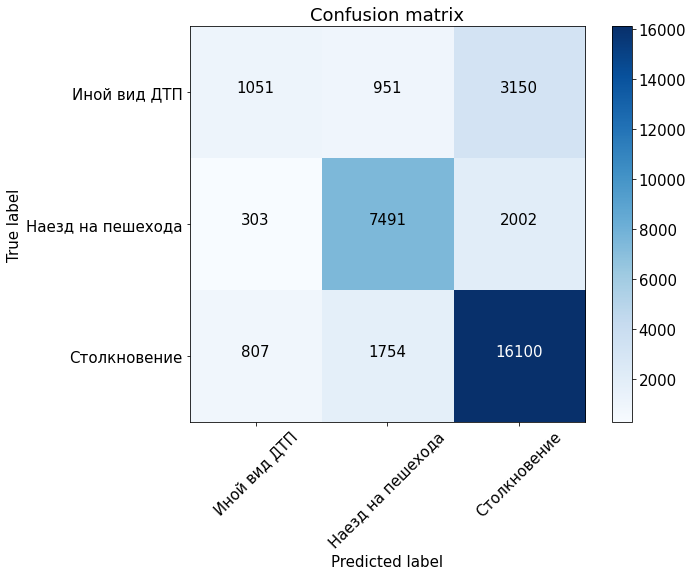

Точность модели составляет : 73.3196465232527


In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Тестируем модель (17) на данных ДТП 2019 года

In [42]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[  950   747  3025]
 [  253  6135  1821]
 [  666  1592 14239]]


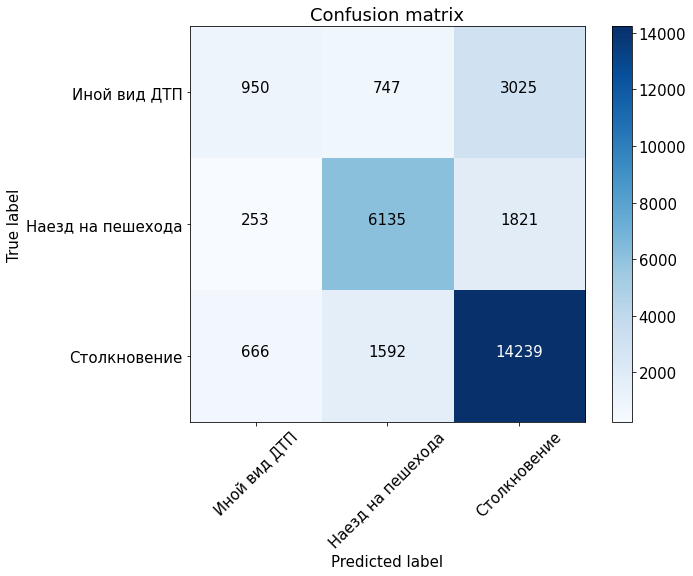

Точность модели составляет : 72.46160119613974


In [43]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X2_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y2_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y2_test,y_pred)*100)

# Обучаем модель Random Forest на данных ДТП 2018 года

In [44]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.7411333273825463

# Тестируем модель (18) на данных ДТП 2018 года

[[ 1085   950  3144]
 [  287  7354  2012]
 [  846  1751 16180]]


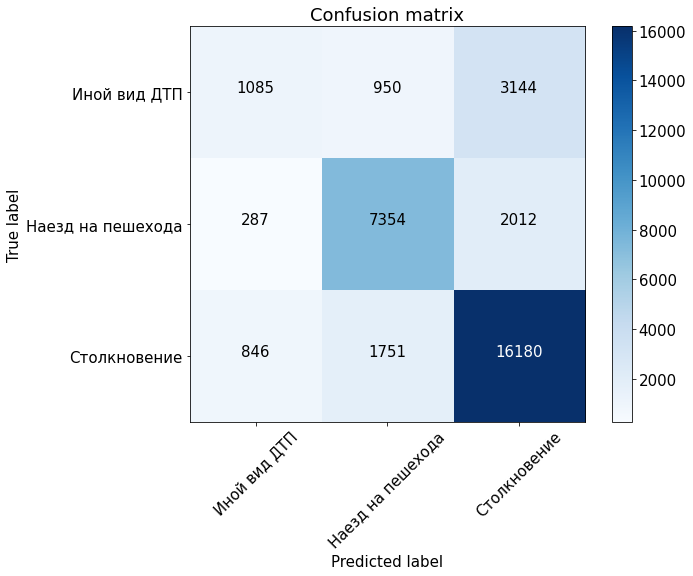

Точность модели составляет : 73.25121247284953


In [46]:
y_pred = rfc.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Тестируем модель (18) на данных ДТП 2019 года

In [47]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[  963   744  2903]
 [  238  6301  1788]
 [  707  1544 14240]]


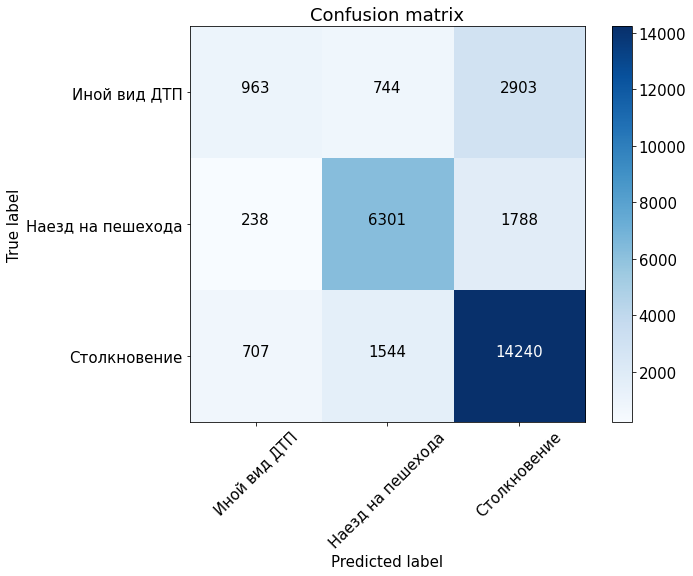

Точность модели составляет : 73.0732635585157


In [48]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X2_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y2_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y2_test,y_pred)*100)

# Обучаем модель Random Forest на данных ДТП 2019 года и тестируем на 2019 год

In [49]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.7361056834593492

[[ 1216   664  2748]
 [  304  6278  1780]
 [  854  1480 14104]]


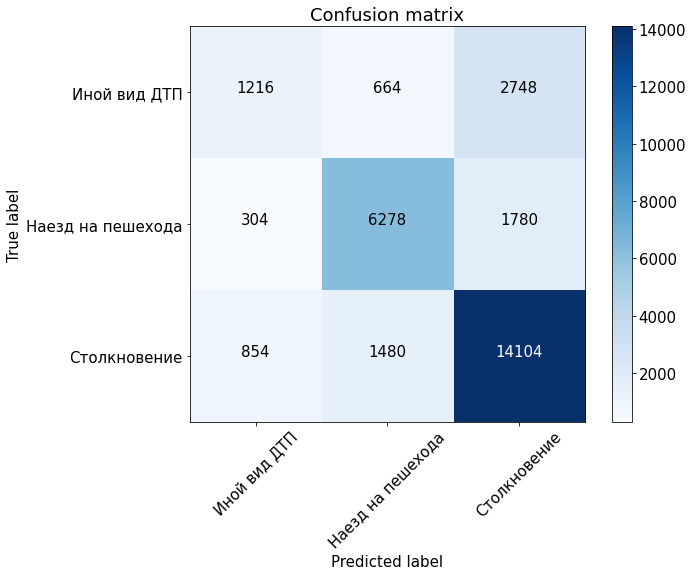

Точность модели составляет : 73.39268723664537


In [50]:
y_pred = rfc.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Лучший показатель точности имеет модель, обученная на данных 2016 года, протестированная на 2017 году 73.8% 

# Оценка важности каждого атрибута 

## Смотрим на показатели модели, включающей все атрибуты

In [65]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.7407554070788814

In [67]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
f = accuracy_score(y1_test,y_pred)*100
print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

Точность модели составляет : 73.81880463028585


## Оцениваем параметр Освещение

In [68]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       #'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       #'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred)*100)
f1 = accuracy_score(y1_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

0.7362195086830055

73.86014646822584
Потеря точности составляет: -0.041341837939981474


##  Оцениваем параметр Алкогольное опьянение

In [69]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       #'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       #'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred)*100)
f1 = accuracy_score(y1_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

0.7335771678714397

73.47625797306875
Потеря точности составляет: 0.342546657217099


##  Оцениваем параметр Состояние дорожного полотна

In [70]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[[#'s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

dfl = df[df['date'].dt.year == 2017]
X = dfl[[#'s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred)*100)
f1 = accuracy_score(y1_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

0.7390274457852144

73.768603827073
Потеря точности составляет: 0.05020080321286002


##  Оцениваем параметр Изменение режима движения

In [71]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       #'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       #'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred)*100)
f1 = accuracy_score(y1_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

0.7333395731935605

73.15142924639736
Потеря точности составляет: 0.6673753838884977


## Оцениваем параметр Участие лиц женского пола в ДТП

In [72]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       #'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       #'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred)*100)
f1 = accuracy_score(y1_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

0.7382786625579587

73.61504842901016
Потеря точности составляет: 0.20375620127569505


## Оцениваем параметр Состояние метеусловий

In [73]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       #'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       #'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred)*100)
f1 = accuracy_score(y1_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

0.736694698038764

73.54712969525158
Потеря точности составляет: 0.27167493503426954


## Оцениваем параметр Фактор нарушения ПДД со стороны водителя

In [74]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       #'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       #'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred)*100)
f1 = accuracy_score(y1_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

0.6703625838781211

67.16572171037089
Потеря точности составляет: 6.653082919914965


## Оцениваем параметр Последствия ДТП

In [75]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       #'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       #'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred)*100)
f1 = accuracy_score(y1_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

0.7373498833626126

73.72135601228443
Потеря точности составляет: 0.09744861800142246


## Оцениваем параметр Объект дорожной сети

In [77]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled']]
       #'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled']]
       #'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred)*100)
f1 = accuracy_score(y1_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

0.6391008841401953

63.50696905268131
Потеря точности составляет: 10.31183557760454


# Визуализация важности признаков

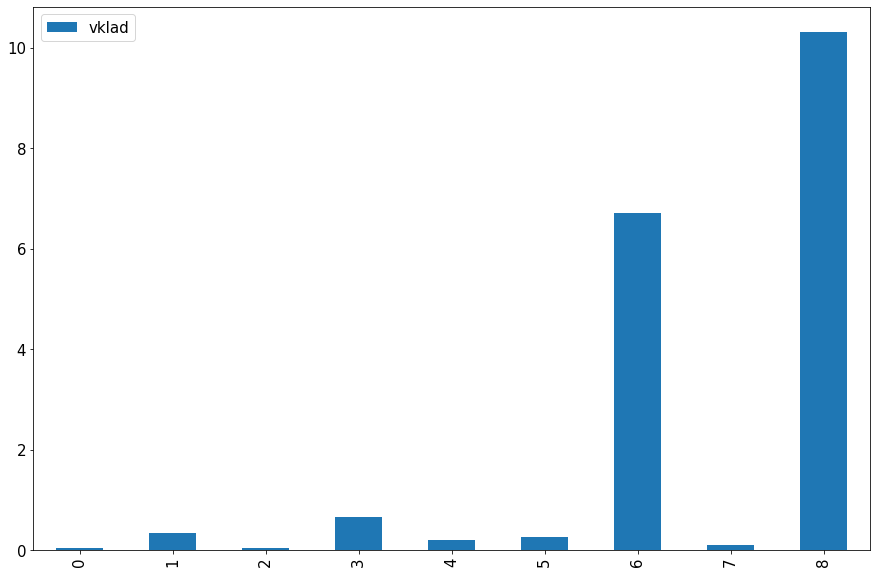

In [79]:
per.plot.bar(figsize=(15, 10))

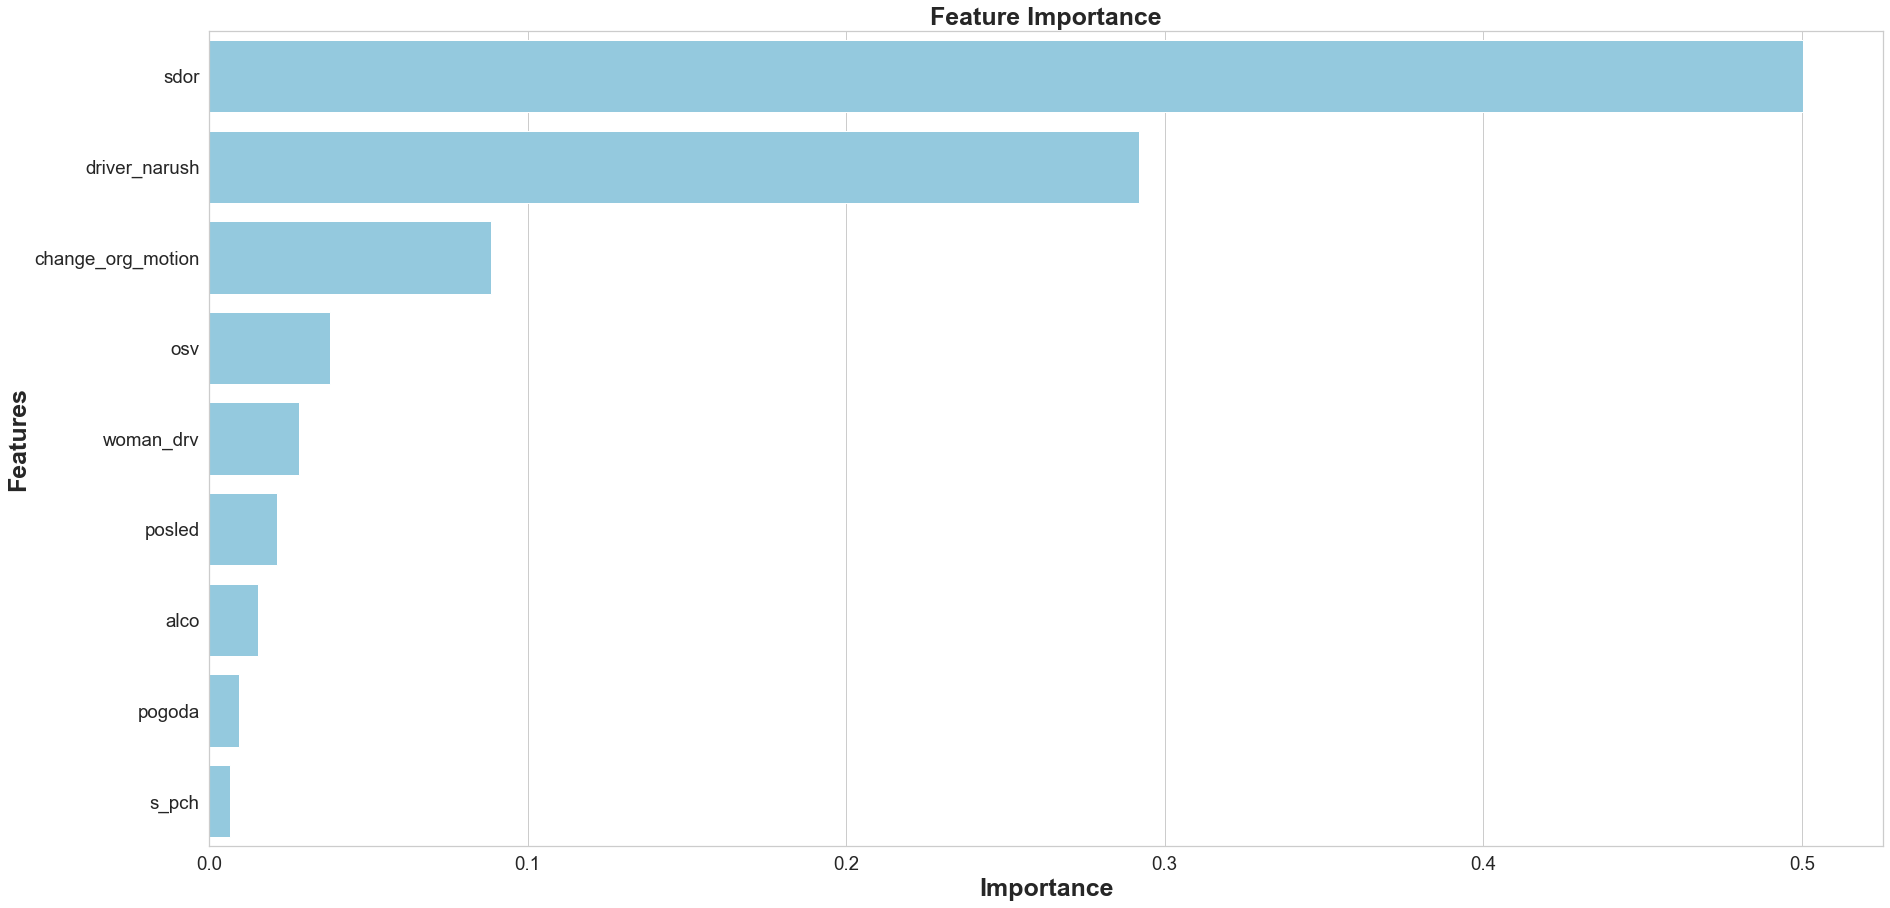

None

,Features,Gini-Importance
0,sdor,0.500501
1,driver_narush,0.291949
2,change_org_motion,0.088391
3,osv,0.037976
4,woman_drv,0.028295
5,posled,0.021454
6,alco,0.015367
7,pogoda,0.009443
8,s_pch,0.006624


In [12]:
import seaborn as sns
feats = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

## Модель выделяет наиболее важными признаками - объект дорожной сети (потеря точности 10,3%), на котором произошло ДТП, фактор нарушения ПДД со стороны водителя (потеря точности 6,7%), изменялся ли режим движения (потеря точности 0,66%).

# Вывод по модели RF()

## Как и модель KNN, алгоритм работает с классом "Иные виды дтп".
## Модель "лучшего года" не может быть выявлена, так как точность у всех примерно одинакова.
## Модель выявила значимость следующих атрибутов - объект дорожной сети (потеря точности 10,3%), на котором произошло ДТП, фактор нарушения ПДД со стороны водителя (потеря точности 6,7%).